# 課題80-1

In [86]:
dl = [[1,2,3],[2,3,4],[5,6,7]]

In [87]:
# Python の list データを Numpy の array データに変換
import numpy as np
data_array = np.array(dl)
print(data_array)

[[1 2 3]
 [2 3 4]
 [5 6 7]]


In [88]:
# Python の list データを Pandas の data frame データに変換
import pandas as pd
data_df = pd.DataFrame(dl)
print(data_df)

   0  1  2
0  1  2  3
1  2  3  4
2  5  6  7


In [89]:
# Numpy の array データを Python の list データに変換
data_list = data_array.tolist()
print(data_list)

[[1, 2, 3], [2, 3, 4], [5, 6, 7]]


In [90]:
# Numpy の array データを Pandas の data frame データに変換
data_df2 = pd.DataFrame(data_array)
print(data_df2)

   0  1  2
0  1  2  3
1  2  3  4
2  5  6  7


In [91]:
# Pandas の data frame データを Python の list データに変換
data_list2 = data_df.values.tolist()
print(data_list)

[[1, 2, 3], [2, 3, 4], [5, 6, 7]]


In [92]:
# Pandas の data frame データを Numpy の array データに変換
data_array2 = data_df.values
print(data_array2)

[[1 2 3]
 [2 3 4]
 [5 6 7]]


# 課題80-2

In [93]:
import urllib.request 

url = "https://github.com/maskot1977/ipython_notebook/blob/master/toydata/Teikoku-Shoin-Japan.xlsx?raw=true"
urllib.request.urlretrieve(url, 'Teikoku-Shoin-Japan.xlsx') 

import pandas as pd
excel = pd.ExcelFile('Teikoku-Shoin-Japan.xlsx') 

In [94]:
sheets = []
for sheet_index in [2,77,78,83]:
  print(excel.sheet_names[sheet_index])
  sheet = excel.parse(excel.sheet_names[sheet_index],header = None)
  sheets.append(sheet)

人口密度　〔2018年〕
1人あたりの都市公園面積　〔2017年3月末〕
1人あたりの電力需要量　〔2015年〕
公害苦情件数　〔2017年〕


In [95]:
!pip install japanize-matplotlib

In [96]:
# sheet0 = sheets[0].iloc[2:49,1:]
# sheet0.columns = ['都道府県名','人口密度']
# sheet1 = sheets[1].iloc[2:49,1:]
# sheet1.columns = ['都道府県名','都市公園面積']
# sheet2 = sheets[2].iloc[3:50,1:]
# sheet2.columns = ['都道府県名','電力需要量']
# sheet3 = sheets[3].iloc[2:49,1:]
# sheet3.columns = ['都道府県名','公害苦情件数']

sheet0 = sheets[0].iloc[2:49,1:]
sheet0.columns = ['都道府県名','human density']
sheet1 = sheets[1].iloc[2:49,1:]
sheet1.columns = ['都道府県名','park area']
sheet2 = sheets[2].iloc[3:50,1:]
sheet2.columns = ['都道府県名','electricity']
sheet3 = sheets[3].iloc[2:49,1:]
sheet3.columns = ['都道府県名','complainments']

In [97]:
sheet01 = pd.merge(sheet0,sheet1,on= "都道府県名")
sheet012 = pd.merge(sheet01,sheet2,on= "都道府県名")
pd.merge(sheet012,sheet3, on = "都道府県名")

,都道府県名,human density,park area,electricity,complainments
0,北海道,64,38.8,2521,1454


In [98]:
sheet0123 = pd.concat([sheet012,sheet3.reset_index()],axis = 1)
sheet0123 = sheet0123.iloc[:,[0,1,2,3,6]]
sheet0123

,都道府県名,human density,park area,electricity,complainments
0,北海道,64,38.8,2521,1454
1,青森,136,18,2378,431
2,岩手,83,14.7,2521,522
3,宮城,317,23.5,2385,586
4,秋田,87,21.6,2487,355
5,山形,119,20.1,2528,702
6,福島,139,13.1,2382,582
7,茨城,484,9.6,2363,3652
8,栃木,310,14.4,2461,1458
9,群馬,313,14.2,2455,1277


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc973d0eb50>,
      dtype=object)

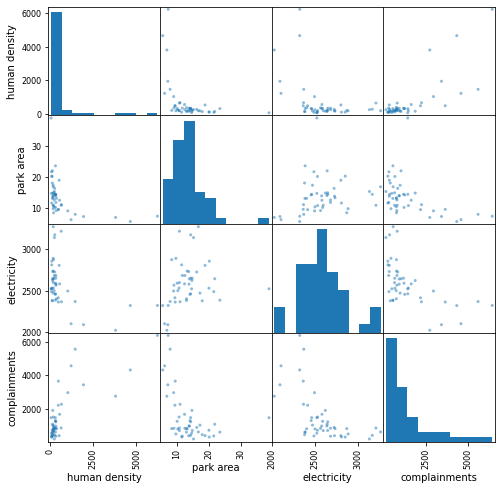

In [99]:
from pandas import plotting
sheet0123 = sheet0123.iloc[:,1:].astype(np.float)
plotting.scatter_matrix(sheet0123,figsize = (8,8))


# 考察

都市公園面積、電力需要量に対して、苦情件数は負の相関があるように見える。これは、都市公園面積や電力需要量が十分にあるような豊かな県では、県民の満足度は高く、苦情をいう人が少ないのではないか。また人口密度が小さいほど、苦情の件数は少ない傾向があり、これも人口密度が小さい方が人同士の接触が減り、苦情を言うことも少なくなるのではないか、と推察される。